##Nama: Achmad Rachmandika Rizky Pratama
##Kelas: 3A
##NIM: 2041720125
##UTS

1. Pilih 5 citra plat nomor untuk setiap anggota kelompok dari dataset yang telah disediakan.
2. Lakukan segmentasi pada citra plat nomor untuk memperjelas karakter pada plat nomor.
3. Anda dapat menggunakan algortima K-Means seperti yang telah dijelaskan pada praktikum sebelumnya atau menggunakan algoritma klasterisasi yang lain.
4. Anda diperkenankan untuk melakukan pra pengolahan data (preprocessing) pada citra seperti,
- Merubah color space
- Reduksi dimensi
- dsb
5. Tampilkan perbandingan citra antara sebelum dan sesudah di segmentasi

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


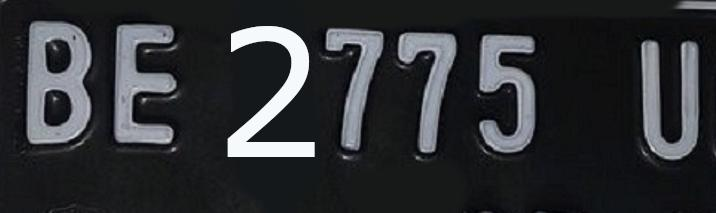

In [3]:
img = cv2.imread('/content/drive/MyDrive/Kuliah Semester 5/Machine Learning/UTS/dummy (1)/dummy/BE2775U_png.rf.1154baadf3d47887a53660553b91c183.jpg')

cv2_imshow(img)

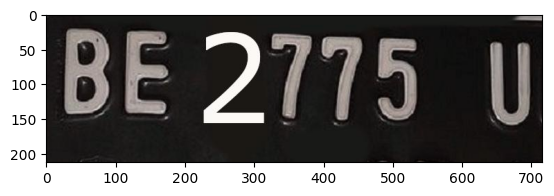

In [4]:
plt.imshow(img)

In [5]:
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

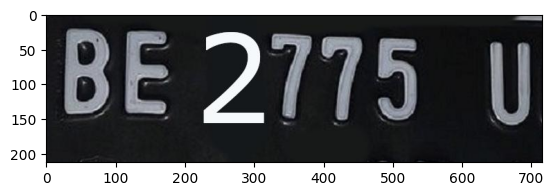

In [6]:
plt.imshow(img2)

In [7]:
img.shape

(213, 716, 3)

In [8]:
h, w, ch= img.shape
print(h)
print(w)
print(ch)

213
716
3


In [9]:
data = img / 255.0
data = data.reshape(h * w, ch)
data.shape

(152508, 3)

In [10]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

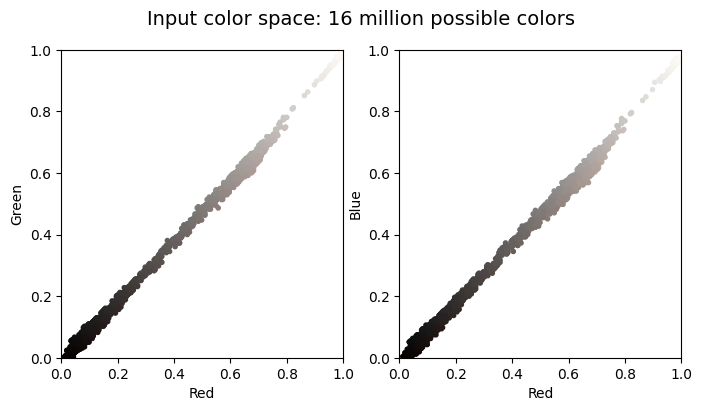

In [11]:
plot_pixels(data, title='Input color space: 16 million possible colors')

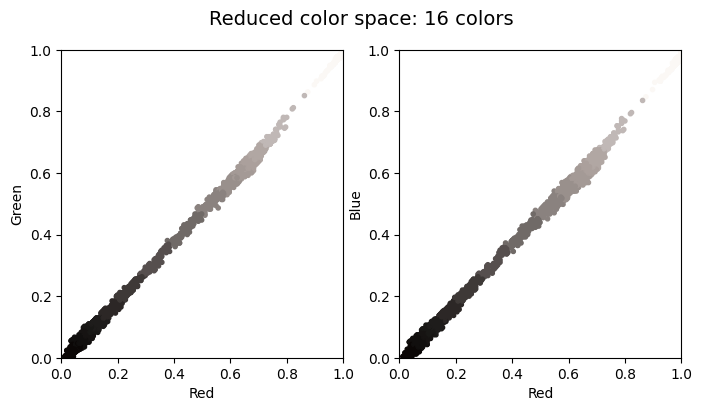

In [12]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

In [13]:
#convert int menjadi float
Z = np.float32(data)

In [14]:
print(Z.dtype, Z.shape)

float32 (152508, 3)


In [15]:
kriteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 1.0)
k=2
ret, label, center = cv2.kmeans(Z,k,None,kriteria,10,cv2.KMEANS_RANDOM_CENTERS)

In [16]:
print(label)

[[1]
 [1]
 [0]
 ...
 [1]
 [1]
 [1]]


In [17]:
print(center)

[[0.6756307  0.64416975 0.6289592 ]
 [0.09630051 0.08785366 0.08267514]]


In [18]:
segmented_data = center[label.flatten()]
segmented_data

array([[0.09630051, 0.08785366, 0.08267514],
       [0.09630051, 0.08785366, 0.08267514],
       [0.6756307 , 0.64416975, 0.6289592 ],
       ...,
       [0.09630051, 0.08785366, 0.08267514],
       [0.09630051, 0.08785366, 0.08267514],
       [0.09630051, 0.08785366, 0.08267514]], dtype=float32)

In [19]:
segmented_image = segmented_data.reshape((img2.shape))
segmented_image

array([[[0.09630051, 0.08785366, 0.08267514],
        [0.09630051, 0.08785366, 0.08267514],
        [0.6756307 , 0.64416975, 0.6289592 ],
        ...,
        [0.09630051, 0.08785366, 0.08267514],
        [0.09630051, 0.08785366, 0.08267514],
        [0.09630051, 0.08785366, 0.08267514]],

       [[0.09630051, 0.08785366, 0.08267514],
        [0.09630051, 0.08785366, 0.08267514],
        [0.09630051, 0.08785366, 0.08267514],
        ...,
        [0.09630051, 0.08785366, 0.08267514],
        [0.09630051, 0.08785366, 0.08267514],
        [0.09630051, 0.08785366, 0.08267514]],

       [[0.09630051, 0.08785366, 0.08267514],
        [0.09630051, 0.08785366, 0.08267514],
        [0.09630051, 0.08785366, 0.08267514],
        ...,
        [0.6756307 , 0.64416975, 0.6289592 ],
        [0.6756307 , 0.64416975, 0.6289592 ],
        [0.6756307 , 0.64416975, 0.6289592 ]],

       ...,

       [[0.09630051, 0.08785366, 0.08267514],
        [0.09630051, 0.08785366, 0.08267514],
        [0.09630051, 0

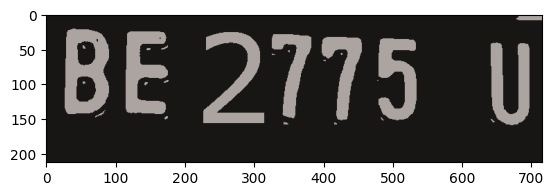

In [20]:
plt.imshow(segmented_image)

Text(0.5, 1.0, '2-color Image')

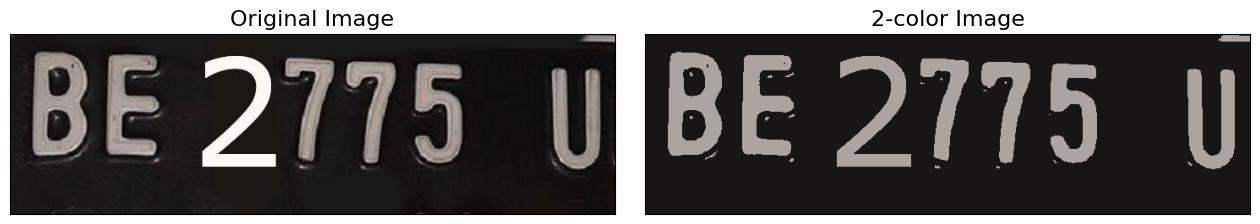

In [21]:
img_recolored = new_colors.reshape(img2.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(img)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(segmented_image)
ax[1].set_title('2-color Image', size=16)

In [52]:
# Daftar path gambar plat
plat_paths = [
    '/content/drive/MyDrive/Kuliah Semester 5/Machine Learning/UTS/dummy (1)/dummy/BM3455A_PNG.rf.f1771f32a53d195647546d4adde981aa.jpg',
    '/content/drive/MyDrive/Kuliah Semester 5/Machine Learning/UTS/dummy (1)/dummy/BG8988A_png.rf.03e24afdce4b368a1212755021c744ea.jpg',
    '/content/drive/MyDrive/Kuliah Semester 5/Machine Learning/UTS/dummy (1)/dummy/17-E-4172-QC-11-18_jpg.rf.242a2fe2326bfdc57b7473d7a998c351.jpg',
    '/content/drive/MyDrive/Kuliah Semester 5/Machine Learning/UTS/dummy (1)/dummy/25-E-2101-PAD-06-21_jpeg.rf.fb688472f5ba9c0c445f9d9330f39508.jpg',
    '/content/drive/MyDrive/Kuliah Semester 5/Machine Learning/UTS/dummy (1)/dummy/35-E-5026-SF-06-18_jpeg.rf.4e7a017518a953610e40e646a6fc1c5a.jpg'
]

In [53]:
# Fungsi untuk segmentasi gambar
def segment_image(img_path, k=2):
    # Load gambar
    img2 = cv2.imread(img_path)
    img3 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    h, w, ch = img2.shape
    data = img2 / 255.0
    data = data.reshape(h * w, ch)

    #proses penggunaan algoritme K-Means untuk segmentasi gambar
    kmeans = MiniBatchKMeans(n_clusters=2, n_init=3)
    kmeans.fit(data)
    new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
    Z = np.float32(data)

    # menentukan nilai k
    kriteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 1.0)
    k = 2
    ret, label, center = cv2.kmeans(Z, k, None, kriteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    #proses segmentasi gambar menggunakan algoritma K-Means.
    segmented_data = center[label.flatten()]
    segmented_image = segmented_data.reshape((img2.shape))

    # Memanggil fungsi plot pixel
    plot_pixels(data, colors=new_colors, title="Reduced color space: 16 colors")

    # Memanggil fungsi img_comparison dengan citra asli dan citra hasil segmentasi
    img_comparison(img2, segmented_image)

In [54]:
# Fungsi untuk plot piksel
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # Pilih subset acak
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=12)

In [55]:
# Fungsi untuk membandingkan gambar asli dan gambar yang telah di segmentasi.
def img_comparison(original, new_colors):
    segmented_img = new_colors.reshape(original.shape)
    fig, ax = plt.subplots(1, 2, figsize=(8, 2), subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(wspace=0.05)
    ax[0].imshow(original)
    ax[0].set_title('Original Image', size=12)
    ax[1].imshow(segmented_img)
    ax[1].set_title('2-color Image', size=12)

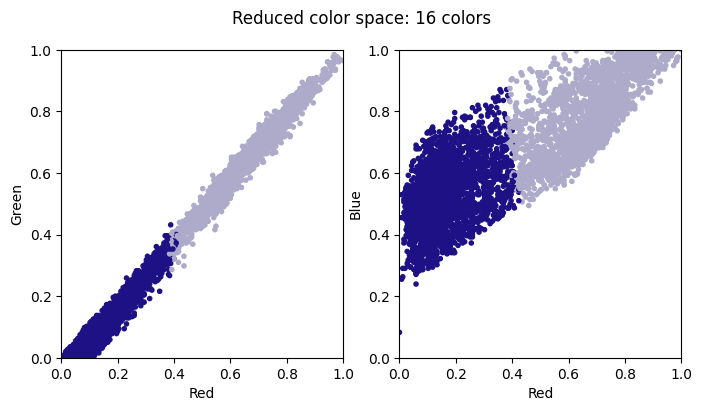

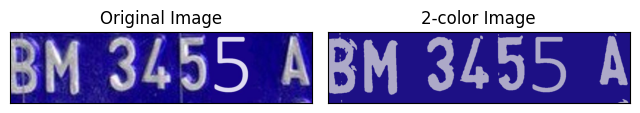

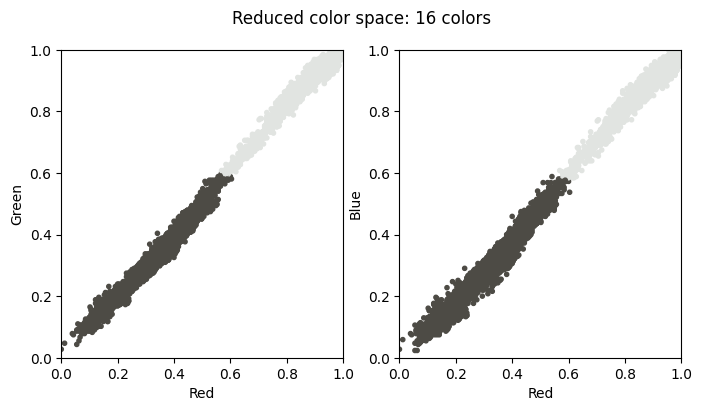

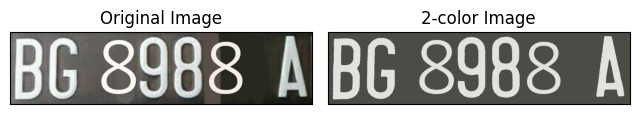

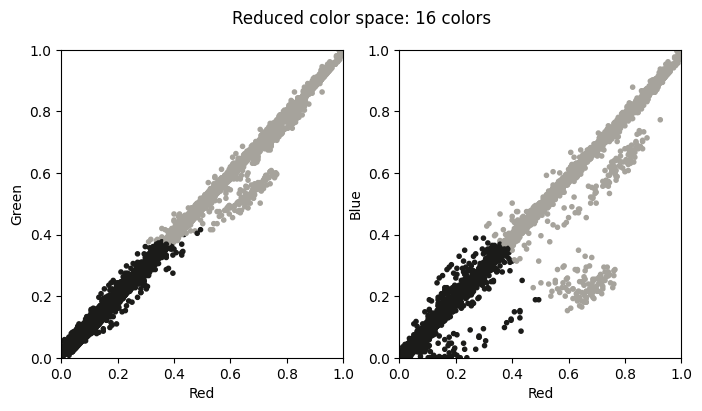

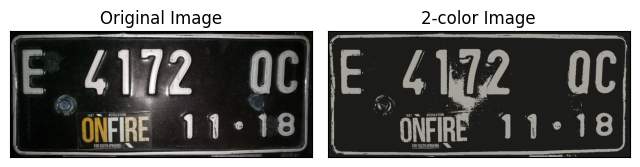

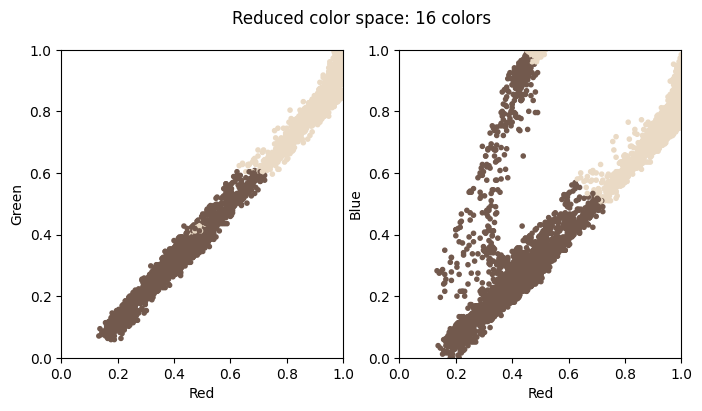

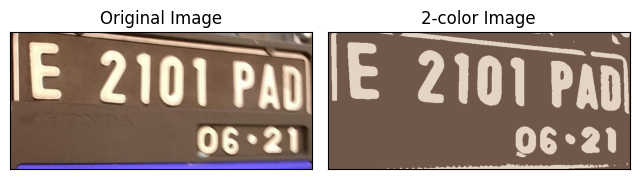

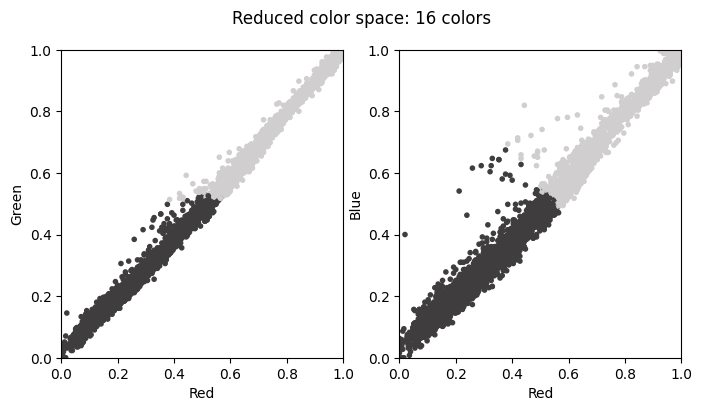

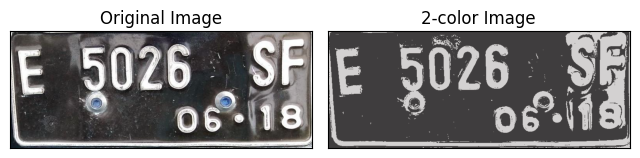

In [56]:
# Iterasi melalui gambar-gambar plat nomor dan melakukan segmentasi pada masing-masing
for plat_path in plat_paths:
    segment_image(plat_path)